# SVM

### Setting up the environment

In [1]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
np.random.seed(100)

### Generating data

In [2]:
# Parameters
num_dims = 1
num_data_points = 50
data_size = (num_data_points, num_dims)
x_scale = 2.
x_offset = -1.
noise_scale = 0.5
weights_scale = np.array([10., 6.])
weights_offset = np.array([-5., -3.])

weights = (np.random.random((num_dims + 1,)) * weights_scale) + weights_offset

split = 10

In [3]:
# Generating the data
X = (np.random.random(data_size) * x_scale) + x_offset

Xa = np.concatenate((np.ones((num_data_points, 1)), X), 1)
y = (Xa @ weights) + np.random.normal(0., noise_scale, (num_data_points,))

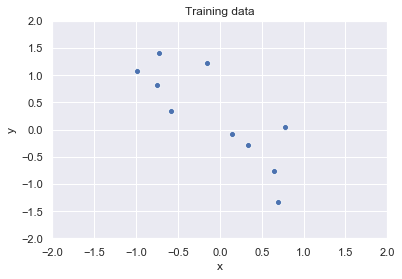

In [4]:
# Visualization
X_train = X[:split, :]
y_train = y[:split]

fig_data = plt.figure()
plt.xlabel('x')
plt.xlim((-2, 2))
plt.ylabel('y')
plt.ylim((-2, 2))
plt.title('Training data')
ax_data = sns.scatterplot(x=X_train.squeeze(), y=y_train)
plt.show()

### Regression

In [5]:
# Training two models
rl = KernelRidge(kernel='linear')
rp = KernelRidge(alpha = 0., kernel='polynomial', degree=split - 1)
rl.fit(X_train, y_train);
rp.fit(X_train, y_train);

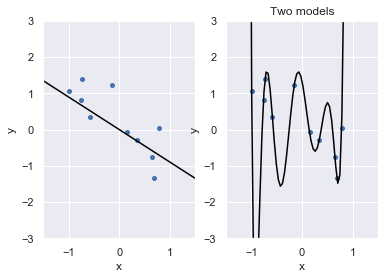

In [6]:
# Creating a vissualization of final result
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_ylabel('y')

plt.title('Two models')
X_vis = np.linspace(-2, 2, 100)[:, None]
yl_vis = rl.predict(X_vis)
yp_vis = rp.predict(X_vis)
axs[0] = sns.scatterplot(x=X_train[:, 0], y=y_train, legend=False, ax=axs[0])
axs[1] = sns.scatterplot(x=X_train[:, 0], y=y_train, legend=False, ax=axs[1])
sns.lineplot(x=X_vis[:, 0], y=yl_vis, color='black', legend=False, ax=axs[0])
sns.lineplot(x=X_vis[:, 0], y=yp_vis, color='black', legend=False, ax=axs[1])
axs[0].set_xlim((-1.5, 1.5))
axs[1].set_xlim((-1.5, 1.5))
axs[0].set_ylim((-3., 3.))
axs[1].set_ylim((-3., 3.))

plt.show()

Mean absolute errors compared (on test data):


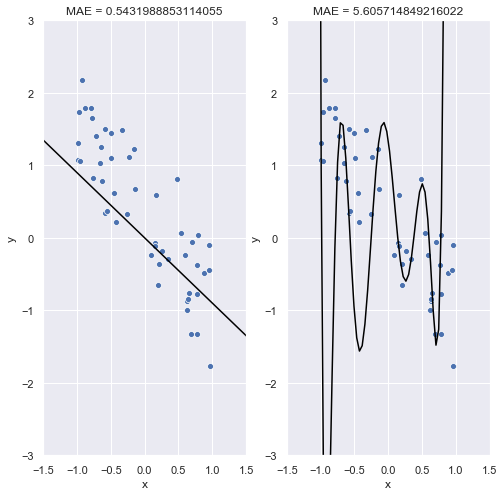

In [15]:
# Creating a vissualization of final result
X_test = X[split:, :]
y_test = y[split:]
yhatl_test = rl.predict(X_test)
yhatp_test = rp.predict(X_test)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_ylabel('y')
X_vis = np.linspace(-2, 2, 100)[:, None]
yl_vis = rl.predict(X_vis)
yp_vis = rp.predict(X_vis)
axs[0] = sns.scatterplot(x=X[:, 0], y=y, legend=False, ax=axs[0])
axs[1] = sns.scatterplot(x=X[:, 0], y=y, legend=False, ax=axs[1])
sns.lineplot(x=X_vis[:, 0], y=yl_vis, color='black', legend=False, ax=axs[0])
sns.lineplot(x=X_vis[:, 0], y=yp_vis, color='black', legend=False, ax=axs[1])
axs[0].set_xlim((-1.5, 1.5))
axs[1].set_xlim((-1.5, 1.5))
axs[0].set_ylim((-3., 3.))
axs[1].set_ylim((-3., 3.))
axs[0].set_title('MAE = ' + str(mean_absolute_error(y_test, yhatl_test)))
axs[1].set_title('MAE = ' + str(mean_absolute_error(y_test, yhatp_test)))
print('Mean absolute errors compared (on test data):')
plt.show()